# CSIT456 Final Project: Legendary Pokémon Classifier
Andre Stillo

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

This dataset contains information from the first seven mainline Pokémon games regarding all existing Pokémon up until that point (802 samples). 41 different categories are present (one is used for indexing, so effectivelty there are 40): 
1. name: The English name of the Pokémon.
2. japanese_name: The Japanese name of the Pokémon.
3. pokedex_number: The entry number of the Pokémon in the National Pokdex. **In this assignment, this entry is used as the index to reduce confusion when indexing, since this starts at 1 instead of 0.**
4. percentage_male: Percentage of the species that is male. Blank if the Pokémon is genderless.
5. type1: Primary type of the Pokémon.
6. type2: Secondary type of the Pokémon.
7. classification: Classification of the Pokémon.
8. height_m: Height in meters.
9. weight_kg: Weight in kilograms.
10. capture_rate: Probability of capture.
11. base_egg_steps: Number of steps required to hatch an egg of the Pokémon.
12. abilities: Stringified list of possible abilities.
13. experience_growth: Experience needed to reach level 100.
14. base_happiness: Base happiness level of the Pokémon.
15. against_?: 18 features denoting the damage a particular type of attack will do to the Pokémon.
16. hp: Base HP.
17. attack: Base attack.
18. defense: Base defense.
19. sp_attack: Base special attack.
20. sp_defense: Base special defense.
21. speed: Base speed.
22. base_total: total of all stats.
23. generation: Numbered generation in which the Pokémon was introduced (NOTE: Generation refers to the game number. Pokémon released in the second game are considered to be from the second generation)
24. is_legendary: Denotes if the Pokémon is legendary (**TARGET VARIABLE**)

The target is to predict if a Pokémon is legendary based on the present predictor variables. While no explicit criteria exist for a Pokémon to be considered legendary beyond "the game developers said so," they are generally considered to be extremely rare and powerful. Several features are generally thought to be directly correlated with this, including hgih capture rate, high experience growth, high base stat total, and 9even though these pokemon cannot be hatched from eggs) high base egg steps. These factors should make it possible to build a classifier for legendary Pokémon.

Dataset source: https://www.kaggle.com/rounakbanik/pokemon

In [2]:
data = pd.read_csv("pokemon.csv", index_col='pokedex_number')
#Setting the index as the pokedex number to avoid confusion.
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

## Data Cleaning & Preparation

Checking the data over for null values.

In [4]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0


Four categories contain null values.

### percentage_male

For this column, it was stated in the source of the dataset that a null value implies that the Pokémon is exclisively genderless. In order to prevent errors, however, this will be changed to 0. While this is technically correct, it could also imply a 100% female rate, but this is still likely the best choice.

In [5]:
data['percentage_male'].fillna(0, inplace=True)

### type2

In regards to the null values in the type2 category, this is easily explained. Pokémon have at least one, but potentially two types, with the second being optional. As such, any Pokémon with only one type has a null value for their second type. These null values will be replaced with 'None' as a solution to this.

In [6]:
data['type2'].fillna('None', inplace=True)
data['type2'].isnull().sum()

0

### height_m and weight_kg

Null values in these categories are much less easily explained, as no Pokémon actually has an unknown height or weight. As such, it seemed important to see exactly which values were unknown.

In [7]:
mask = data['height_m'].isnull() | data['weight_kg'].isnull()
data[mask].name
#NOTE: Code referenced from this link:
# https://stackoverflow.com/questions/40408471/select-data-when-specific-columns-have-null-value-in-pandas

pokedex_number
19       Rattata
20      Raticate
26        Raichu
27     Sandshrew
28     Sandslash
37        Vulpix
38     Ninetales
50       Diglett
51       Dugtrio
52        Meowth
53       Persian
74       Geodude
75      Graveler
76         Golem
88        Grimer
89           Muk
103    Exeggutor
105      Marowak
720        Hoopa
745     Lycanroc
Name: name, dtype: object

In [8]:
data[mask].shape[0]

20

Since the same 20 Pokémon have this issue for both height and weight, it can be concluded just why these null values exist, and what to replace them with.

From the fact that this dataset has not been updated since the seventh generation of games (at this point, there is in fact an eight generation,but we will ignore it for the sake of staying consistent with the data), there is a very clear pattern as to the entries that have these null values. That being that every single one received an alternate form in the seventh generation of games. Those in the above list up to 104 recieved an alternate form called Alolan forms (the ingame explanation of which was a species mutation based on area), while Hoopa recieved an event exclusive Unbound form through the use of a certain item, and Lycanroc has a different form depending on the time of day it is encountered. While each of these forms do have different data, we will disregard them for the sake of this dataset. The fact is that the missing values of these Pokémon do exist, in fact it exists on the same website that the dataset is scraped from (http://serebii.net/), it is just likely that at the time of scraping, this data was unavailable as they were unsure of how to handle these alternate forms.

As such, though tedious, best course of action is filling in the accurate data from that same source.

All the following data was taken directly from http://serebii.net/

In [9]:
#Rattata
data.at[19, 'height_m'] = 0.3
data.at[19, 'weight_kg'] = 3.5

#Raticate
data.at[20, 'height_m'] = 0.7
data.at[20, 'weight_kg'] = 18.5

#Raichu
data.at[26, 'height_m'] = 0.8
data.at[26, 'weight_kg'] = 30.0

#Sandshrew
data.at[27, 'height_m'] = 0.6
data.at[27, 'weight_kg'] = 12.0

#Sandslash
data.at[28, 'height_m'] = 1.0
data.at[28, 'weight_kg'] = 29.5

#Vulpix
data.at[37, 'height_m'] = 0.6
data.at[37, 'weight_kg'] = 9.9

#Ninetails
data.at[38, 'height_m'] = 1.1
data.at[38, 'weight_kg'] = 19.9

#Diglett
data.at[50, 'height_m'] = .2
data.at[50, 'weight_kg'] = .8

#Dugtrio
data.at[51, 'height_m'] = .7
data.at[51, 'weight_kg'] = 33.3

#Meowth
data.at[52, 'height_m'] = .4
data.at[52, 'weight_kg'] = 4.2

#Persian
data.at[53, 'height_m'] = 1
data.at[53, 'weight_kg'] = 32

#Geodude
data.at[74, 'height_m'] = .4
data.at[74, 'weight_kg'] = 20

#Graveler
data.at[75, 'height_m'] = 1
data.at[75, 'weight_kg'] = 105

#Golem
data.at[76, 'height_m'] = 1.4
data.at[76, 'weight_kg'] = 300

#Grimer
data.at[88, 'height_m'] = .9
data.at[88, 'weight_kg'] = 30

#Muk
data.at[89, 'height_m'] = 1.2
data.at[89, 'weight_kg'] = 30

#Exeggutor
data.at[103, 'height_m'] = 2
data.at[103, 'weight_kg'] = 120

#Marowak
data.at[105, 'height_m'] = 1
data.at[105, 'weight_kg'] = 45

#Hoopa
data.at[720, 'height_m'] = .5
data.at[720, 'weight_kg'] = 9

#Lycanroc
data.at[745, 'height_m'] = .8
data.at[745, 'weight_kg'] = 25

In [10]:
data.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

This eliminates all null values.

One other small bit of preprocessing is being done to prevent errors, specifically related to the Pokémon Minior. This Pokémon has two different forms (meteorite and core), and has different capture rates in each form, which is reflected in its entry in this column.

In [11]:
data.at[774, 'capture_rate']

'30 (Meteorite)255 (Core)'

While there is no issue with this in the dataframe, when fitting the model for Logistic Regression, this value caused issues due to being an object, and hence it would be necessary to convert the entire column to dummy variables. This seems excessive considering this is the only categorical entry, so we will instead change the value to ignore the core form and change the data type of the column to be int64.

In [12]:
data.at[774, 'capture_rate'] = '30'
data[['capture_rate']] = data[['capture_rate']].apply(pd.to_numeric)
data['capture_rate'].dtypes

dtype('int64')

Finally, the last piece of preparation is to change the type variables into dummy variables in order to allow them to be used as features in Logistic Regression. This also means we only need one set of dummy variables, since the possible values are the same for both features.

In [13]:
type1 = pd.get_dummies(data['type1'],drop_first=True)
type2 = pd.get_dummies(data['type2'],drop_first=True)

types_merged = pd.merge(type1, type2, on='pokedex_number', how='outer')

#Merging the two dataframes
types_merged['dark'] = types_merged['dark_x'].where(types_merged['dark_x']==1, types_merged['dark_y'])
types_merged['dragon'] = types_merged['dragon_x'].where(types_merged['dragon_x']==1, types_merged['dragon_y'])
types_merged['electric'] = types_merged['electric_x'].where(types_merged['electric_x']==1, types_merged['electric_y'])
types_merged['fairy'] = types_merged['fairy_x'].where(types_merged['fairy_x']==1, types_merged['fairy_y'])
types_merged['fighting'] = types_merged['fighting_x'].where(types_merged['fighting_x']==1, types_merged['fighting_y'])
types_merged['fire'] = types_merged['fire_x'].where(types_merged['fire_x']==1, types_merged['fire_y'])
types_merged['flying'] = types_merged['flying_x'].where(types_merged['flying_x']==1, types_merged['flying_y'])
types_merged['ghost'] = types_merged['ghost_x'].where(types_merged['ghost_x']==1, types_merged['ghost_y'])
types_merged['grass'] = types_merged['grass_x'].where(types_merged['grass_x']==1, types_merged['grass_y'])
types_merged['ground'] = types_merged['ground_x'].where(types_merged['ground_x']==1, types_merged['ground_y'])
types_merged['ice'] = types_merged['ice_x'].where(types_merged['ice_x']==1, types_merged['ice_y'])
types_merged['normal'] = types_merged['normal_x'].where(types_merged['normal_x']==1, types_merged['normal_y'])
types_merged['poison'] = types_merged['poison_x'].where(types_merged['poison_x']==1, types_merged['poison_y'])
types_merged['psychic'] = types_merged['psychic_x'].where(types_merged['psychic_x']==1, types_merged['psychic_y'])
types_merged['rock'] = types_merged['rock_x'].where(types_merged['rock_x']==1, types_merged['rock_y'])
types_merged['steel'] = types_merged['steel_x'].where(types_merged['steel_x']==1, types_merged['steel_y'])
types_merged['water'] = types_merged['water_x'].where(types_merged['water_x']==1, types_merged['water_y'])

In [14]:
#Dropping _x and _y features
types_merged.drop(['dark_x', 'dark_y', 'dragon_x', 'dragon_y', 'electric_x', 'electric_y','fairy_x', 'fairy_y', 'fighting_x', 'fighting_y', 'fire_x', 'fire_y', 'flying_x', 'flying_y','ghost_x', 'ghost_y', 'grass_x', 'grass_y', 'ground_x', 'ground_y', 'ice_x', 'ice_y','normal_x', 'normal_y', 'poison_x', 'poison_y', 'psychic_x', 'psychic_y', 'rock_x', 'rock_y','steel_x', 'steel_y', 'water_x', 'water_y'], axis=1, inplace=True)
types_merged

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
pokedex_number,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
798,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
799,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#Dropping the original type1 and type2 features
data.drop(['type1', 'type2'],axis=1,inplace=True)

In [16]:
#Merging the new type features back into the full data
data = pd.concat([data, types_merged],axis=1)

In [17]:
data.columns.values

array(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'sp_attack', 'sp_defense', 'speed',
       'weight_kg', 'generation', 'is_legendary', 'bug', 'dark', 'dragon',
       'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost',
       'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock',
       'steel', 'water'], dtype=object)

With this, the dataset is ready to be used for classification, although we can further narrow down our predictor variables.

## Data Preprocessing

Though we can start using the machine learning classification as is, it is highly likely that some of the features of this dataset are not needed for proper prediction. In particular, the **against_?** series of features as well as the **generation** feature almost definitely bear no effect on the **is_legendary** attribute.

Pairplot from Seaborne will be used to identify the highly correlated variables. Categorical values such as **name** will also be removed, as their primary use is identification. 

**NOTE:** This cell will take a bit of time to execute.

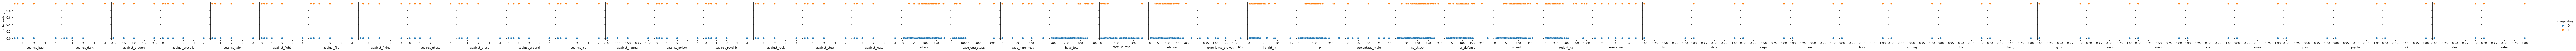

In [18]:
x_vars = data.columns.values.tolist()
x_vars.remove('is_legendary')
x_vars.remove('name')
x_vars.remove('japanese_name')
x_vars.remove('classfication')
x_vars.remove('abilities')
sns.pairplot(data, x_vars = x_vars, y_vars = 'is_legendary', hue='is_legendary', diag_kind=None)
#NOTE: Seaborne has a bug where the first plot in a pairplot will not show in some cases. One workaround is adding
#'diag_kind=None' as an additional parameter.
#https://github.com/mwaskom/seaborn/issues/2260

From these, we can see a few correlations, as well as disregard several variables.

**Definitive Correlations:**
- For all stats **HP**, **attack**, **sp_attack**, **def**, **sp_defense**, and **speed**, those that are legendary tend to have higher values in general. This also aligns with the **base_total** attribute generally being very high on the legendary Pokémon save for a few outliers.
- **experience_growth** seems to be higher on average, despite not having the highest value.
- **base_egg_steps** seems to generally be higher (despite the amount of legendary Pokémon that can actually hatch from eggs being low.)
- Almost universally, legendary Pokémon have a much lower **catch_rate**, being more difficult to catch.

Scaterplots and boxplots of these features are depicted below to further show this beyond the pairplot above, though only **base_total** is shown of the stats:

#### base_total

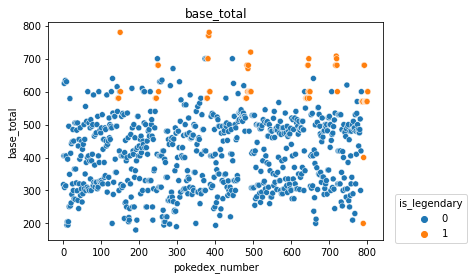

In [19]:
plt.figure()
plt.title('base_total')
plt.xlabel('pokedex_number')
base_total_plot = sns.scatterplot(y='base_total', x=data.index, data=data, hue='is_legendary')
base_total_plot.legend(loc='right', bbox_to_anchor=(1.25, .1), borderaxespad=0, title='is_legendary')
plt.show()

<AxesSubplot:title={'center':'base_total'}, xlabel='is_legendary'>

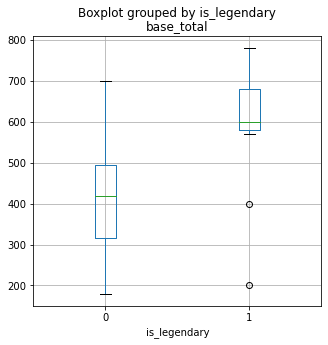

In [20]:
data.boxplot(column='base_total', by='is_legendary', figsize=(5, 5))

Regarding the two outliers in this plot, the cause of these is the fact that they are the only two legendary Pokémon that are part of en evolutionary line. This means that one eventually turns into another, which in turn becomes another. The members of this line are shown below:

In [21]:
data.iloc[788:790, 19:40]

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,...,name,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,bug,dark
pokedex_number,,,,,,,,,,,,,,,,,,,,,
789,29,30720,0,200,45,Nebula Pokémon,31,1250000,0.2,43,...,Cosmog,0.0,29,31,37,0.1,7,1,0,0
790,29,30720,0,400,45,Protostar Pokémon,131,1250000,0.1,43,...,Cosmoem,0.0,29,131,37,999.9,7,1,0,0


The latter sample then evolves into one of the two following which are much more consistent with legendary Pokémon, depending on certain conditions:

In [22]:
data.iloc[790:792, 19:40]

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,...,name,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,bug,dark
pokedex_number,,,,,,,,,,,,,,,,,,,,,
791,137,30720,0,680,45,Sunne Pokémon,107,1250000,3.4,137,...,Solgaleo,0.0,113,89,97,230.0,7,1,0,0
792,113,30720,0,680,45,Moone Pokémon,89,1250000,4.0,137,...,Lunala,0.0,137,107,97,120.0,7,1,0,0


#### experience_growth

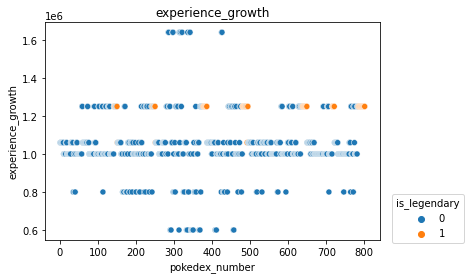

In [23]:
plt.figure()
plt.title('experience_growth')
plt.xlabel('pokedex_number')
experience_growth_plot = sns.scatterplot(y='experience_growth', x=data.index, data=data, hue='is_legendary')
experience_growth_plot.legend(loc='right', bbox_to_anchor=(1.25, .1), borderaxespad=0, title='is_legendary')
plt.show()

<AxesSubplot:title={'center':'experience_growth'}, xlabel='is_legendary'>

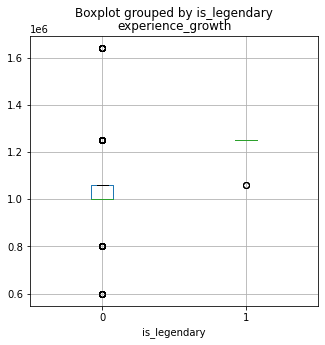

In [24]:
data.boxplot(column='experience_growth', by='is_legendary', figsize=(5, 5))

**NOTE:** Regarding this plot, an important point is that the y-axis is actually in millions, looking at the actual data for **experience_growth** shows this. The one outlier is just a single value differing from the others.

#### base_egg_steps

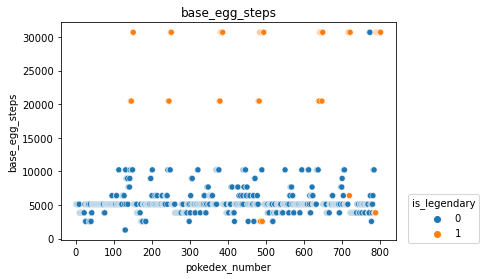

In [25]:
plt.figure()
plt.title('base_egg_steps')
plt.xlabel('pokedex_number')
base_egg_steps_plot = sns.scatterplot(y='base_egg_steps', x=data.index, data=data, hue='is_legendary')
base_egg_steps_plot.legend(loc='right', bbox_to_anchor=(1.25, .1), borderaxespad=0, title='is_legendary')
plt.show()

<AxesSubplot:title={'center':'base_egg_steps'}, xlabel='is_legendary'>

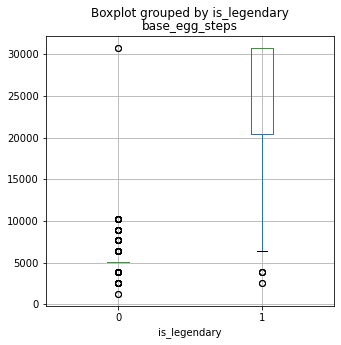

In [26]:
data.boxplot(column='base_egg_steps', by='is_legendary', figsize=(5, 5))

Outliers for the is_legendary category are the samples that actually can hatch from eggs.

#### capture_rate

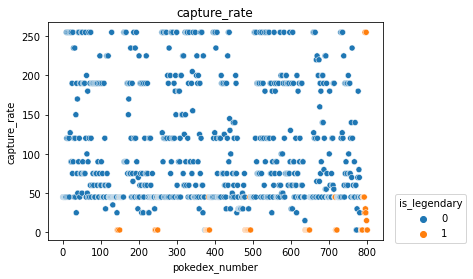

In [27]:
plt.figure()
plt.title('capture_rate')
plt.xlabel('pokedex_number')
capture_rate_plot = sns.scatterplot(y='capture_rate', x=data.index, data=data, hue='is_legendary')
capture_rate_plot.legend(loc='right', bbox_to_anchor=(1.25, .1), borderaxespad=0, title='is_legendary')
plt.show()

<AxesSubplot:title={'center':'capture_rate'}, xlabel='is_legendary'>

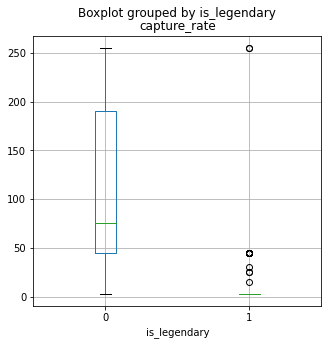

In [28]:
data.boxplot(column='capture_rate', by='is_legendary', figsize=(5, 5))

As for the two outliers here, there is no real explanation, as they are standard legendary Pokémon, they just happen to have a very high catch rate. While the ones closer to the actual "box" of the is_legendary category are technically outliers, it is worth noting that they are still lower than Q1 on the other category.

**Non-correlated features:**
- As mentioned previously, the **against_?** features are likely irrelevant, and are moreso an offshoot of the type variables.
- **generation** is also irrelevant to prediction, the only correlation is that there are less legendary than non-legendary per generation, but this is not relevant towards prediction.
- The variables **name**, **japanese_name**, and **classification** will all be dropped since they are categorical identifying features.

**Other observations:**
- **base_happiness** seems irrelevant, but due to one unique value in legendaries it might not be a good idea to remove it.
- Though **abilities** undoubtedly can play a role in predicting a legendary, they need to be cut due to how the feature is represented (Stringified list). Including this as a feature would necessitate the creation of 233 different dummy variables.
- Physical features such as **height_m** and **weight_kg**, as well as all of the type variables will be included. Despite no apparent correlation, disregarding them seems to not paint an accurate picture of physical characteristics.
- **percentage_male** will also be included despite no apparent correlation for a similar reason, in addition to the fact that ignoring this feature overlooks that fact that some legendaries can be gendered (though it is a minority).

From this, we will make two different dataframes, one X with the predictor variables, and another Y with the target variable.

In [29]:
predictor_features = ['attack', 'base_egg_steps', 'base_total', 'capture_rate',
                     'defense', 'experience_growth', 'height_m', 'hp',
                     'percentage_male', 'sp_attack', 'sp_defense', 'speed',
                     'weight_kg', 'dark', 'dragon', 'electric', 'fairy', 'fighting',
                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic',
                     'rock', 'steel', 'water']

y = data.is_legendary
X = data[predictor_features]

### A Note Regarding the data:

Before going into the machine learning evaluation, it is important to note fact that this dataset is extremely imbalanced.

In [30]:
data['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [31]:
data['is_legendary'].value_counts(normalize='true')

0    0.912609
1    0.087391
Name: is_legendary, dtype: float64

<AxesSubplot:xlabel='is_legendary', ylabel='count'>

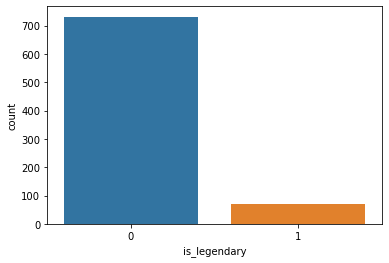

In [32]:
sns.countplot(x='is_legendary', data = data)

Only around 9% of the data consists of our target variable. For this reason, special measures will be taken when evaluating the effectiveness of the machine learning models. In particular, accuracy could be misleading, and as such, while it will still be shown, more focus will be given to precision, recall, F1 score and the confusion matrix.

## Classification via Machine Learning

#### Splitting the data

Since the target variable, is_legendary, is boolean, and hence categorical, we will use classification.

We split the data set into the train set (70%) and the test set (30%). Note that both in the case of train_test_split and all further applicable functions, a **random_state** parameter will be set in order for analysis to be accurate.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=28)

### Logistic Regression

Logistic Regression does not have any critical hyperparameters to tune, so we are able to just create the model, train it on the train set, and use it to predict the test set.

In [34]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 801)
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)

#### Evaluation

We then can use the precision, recall, F1 Score and confusion matrix to evaluate the performance of the Logistic Regression model. Accuracy is also shown, but due to the imbalanced nature of this data set, it is not considered as much as a metric of evaluation.

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_lr)

0.8500000000000001

In [36]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_lr)

0.8095238095238095

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_lr)

0.8947368421052632

Full classification report:

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       220
           1       0.89      0.81      0.85        21

    accuracy                           0.98       241
   macro avg       0.94      0.90      0.92       241
weighted avg       0.97      0.98      0.97       241



Confusion matrix:

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_lr)

array([[218,   2],
       [  4,  17]], dtype=int64)

Overall, the Logistic Regression model performed fairly well, with above 90% in precision, recall, and F1 score. These values could be slightly improved given the small sample size of legendary Pokémon, but for such an imbalanced data set, these results are very good.

#### Visualization

Visualization of the ROC Curve:

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

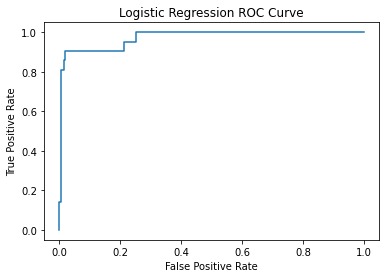

In [40]:
y_pred_prob_lr = reg.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_lr)

plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

AUC score:

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score (y_test, y_pred_prob_lr)

0.9733766233766233

This is a very good AUC score overall.

### K-Nearest Neighbors

Unlike Logistic Regression, K-Nearest Neighbors has a critical hyperparameters to tune in **n_neighbors**. However, a second hyperparameter in the **metric** parameter, which defines the distance metric used, will also be tuned. 

The list of distance metrics was taken directly from [The KNeighborsClassifier API Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

knn = KNeighborsClassifier()
#Range selected is odd neighbors from 1 to 21
n_neighbors = np.arange(1, 21, 2)
distances = ['euclidean', 'manhattan', 'chebyshev', 'minkowski',
            'wminkowski', 'seuclidean', 'mahalanobis']

param_grid = dict(n_neighbors=n_neighbors, metric=distances)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=28)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
grid_result = grid.fit(X_train, y_train)

print("Best cross-validation score: {:.3f}".format(grid_result.best_score_))
best_n_neighbors = grid_result.best_params_.get('n_neighbors')
best_distance_metric = grid_result.best_params_.get('metric')
print("Best n_neighbors: {}".format(best_n_neighbors))
print("Best distance metric: {}".format(best_distance_metric))

Best cross-validation score: 0.951
Best n_neighbors: 1
Best distance metric: manhattan


Then using the **best_n_neighbors**, we train the model on the test set and test it on the test set.

In [43]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_distance_metric)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#### Evaluation

We will then use the precision, recall, F1 Score and confusion matrix to evaluate the performance of the Logistic Regression model. Accuracy is also shown, but due to the imbalanced nature of this data set, it is not considered as much as a metric of evaluation.

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_knn)

0.9767441860465117

In [45]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn)

1.0

In [46]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn)

0.9545454545454546

Full classification report:

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.95      1.00      0.98        21

    accuracy                           1.00       241
   macro avg       0.98      1.00      0.99       241
weighted avg       1.00      1.00      1.00       241



Confusion matrix:

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[219,   1],
       [  0,  21]], dtype=int64)

#### Visualization

Visualization of the ROC Curve:

Text(0.5, 1.0, 'K-Nearest Neighbors ROC Curve')

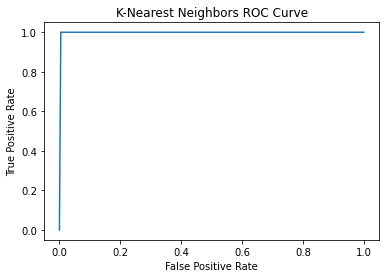

In [49]:
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_knn)

plt.plot(fpr, tpr, label = 'K-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')

AUC score:

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score (y_test, y_pred_prob_knn)

0.9977272727272728

This is also a very good AUC score, and higher than the Logistic Regression model.

##  Model Comparison

Both models performed fairly well in testing. A **random_state** variable was set in order to evaluate the performances against each other, although it could be removed for different, albeit similar results.

### ROC AUC Score:

While the ROC curve could be negatively affected by the imbalanced dataset, it should still be considered as a metric for evaluation.

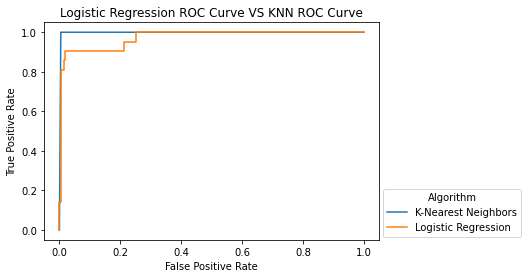

In [51]:
fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_knn)

plt.plot(fpr, tpr, label = 'K-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_lr)

plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.title('Logistic Regression ROC Curve VS KNN ROC Curve')
plt.legend(loc='right', bbox_to_anchor=(1.425, .125), borderaxespad=0, title='Algorithm')

In [52]:
print("Logistic Regression AUC Score: ", roc_auc_score (y_test, y_pred_prob_lr))
print("K-Nearest Neighbors AUC Score: ", roc_auc_score (y_test, y_pred_prob_knn))

Logistic Regression AUC Score:  0.9733766233766233
K-Nearest Neighbors AUC Score:  0.9977272727272728


For the AUC score, K-nearest Neighbors was higher by around .024, or 2.4%. Looking at the ROC curve itself, we can see that K-Nearest-Neighbors tended to stay above that of Logistic Regression.

However, as previously mentioned the ROC curve and AUC score could be misleading due to the imbalanced data set, so we will look at several other metrics as well.

#### LR: 0 - KNN: 1 

### Recall

In [53]:
print("Logistic Regression recall: ", recall_score(y_test, y_pred_lr))
print("K-Nearest Neighbors recall: ", recall_score(y_test, y_pred_knn))

Logistic Regression recall:  0.8095238095238095
K-Nearest Neighbors recall:  1.0


K-Nearest Neighbors also has not only a higher recall than Logistic Regression, but a perfect score for recall, which is a big plus for the model, considering the mission statement for this project was to create a classifier for legendary Pokémon.

#### LR: 0 - KNN: 2

### Precision

In [54]:
print("Logistic Regression precision: ", precision_score(y_test, y_pred_lr))
print("K-Nearest Neighbors precision: ", precision_score(y_test, y_pred_knn))

Logistic Regression percision:  0.8947368421052632
K-Nearest Neighbors percision:  0.9545454545454546


K-Nearest Neighbors once again outperforms Logistic Regression in this metric as well.

#### LR: 0 - KNN: 3

### F1 Score

In [55]:
print("Logistic Regression F1 Score: ", f1_score(y_test, y_pred_lr))
print("K-Nearest Neighbors F1 Score: ", f1_score(y_test, y_pred_knn))

Logistic Regression F1 Score:  0.8500000000000001
K-Nearest Neighbors F1 Score:  0.9767441860465117


As expected since the recall scores were the same and K-Nearest Neighbors had a higher recall, the F1 score for K-Nearest Neighbors is also higher than the Logistic Regression model.

#### LR: 0 - KNN: 4

## KNN Performed Better Overall!

However, for the sake of a full analysis, the confusion matrices side by side should show the full difference in performance.

In [56]:
print("Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("\nK-Nearest Neighbors:\n", confusion_matrix(y_test, y_pred_knn))

Logistic Regression:
 [[218   2]
 [  4  17]]

K-Nearest Neighbors:
 [[219   1]
 [  0  21]]


Overall, Logistic Regression predicted one more false positive and 4 more false negatives.

It is important to note that while the Logistic Regression model did get outperformed, and generally is outperformed by the KNN model, it still does fairly well overall, often coming extremely close to the KNN model. The original **random_state** value chosen had it underperform by a single false negative in comparison to KNN (37 for both the train_test_split and the KFold declaration in KNN).

## Classification Again Without Stats

#### Preparation

A secondary goal within this project was to predict a Pokémon's status as legendary or not without considering their stats (**hp**, **attack**, **sp_attack**, **defense**, **sp_defense**, **speed**, and **base_total**). This is one of the few areas where a correlation has been acknowledged, save for the two outliers in an evolutionary line previously mentioned within the Data Preparation section and one other outlier which many members of the Pokémon commiunity consider debatable in terms of its legendary status. It is noted that most legendary Pokémon have a BST (base stat total, corresponding to the **base_total** column) of either 580, 600 or 650, with some another common value being 570 for a group of legendaries introduced in the seventh generation.

So if these columns were to be dropped, would the rates of correct predictions still be as good as above?

In [57]:
X_modified = X.drop(['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed', 'base_total'], axis=1)
X_modified.head(5)

,base_egg_steps,capture_rate,experience_growth,height_m,percentage_male,weight_kg,dark,dragon,electric,fairy,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,5120,45,1059860,0.7,88.1,6.9,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,5120,45,1059860,1.0,88.1,13.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,5120,45,1059860,2.0,88.1,100.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5120,45,1059860,0.6,88.1,8.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5120,45,1059860,1.1,88.1,19.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,30720,25,1250000,9.2,0.0,999.9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
798,30720,255,1250000,0.3,0.0,0.1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
799,30720,15,1250000,5.5,0.0,888.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


While this does leave very few features, several of the remaining were shown to have correlations with the **is_legendary** status in the Data Preparation section. Thus we will rerun the machine learning algorithms with this modified data to see if these other features can still lead to an accurate prediction.

#### Splitting the data

As before, we will split the data with a **random_state** set (The same state is used in order to keep the same y variables).

In [58]:
X_m_train, X_m_test, y_train, y_test = train_test_split(X_modified, y, test_size = 0.3, random_state=28)

### Logistic Regression

Creation of a Logistic Regression model, training, and testing it.

In [59]:
reg_m = LogisticRegression(max_iter = 801)
reg_m.fit(X_m_train, y_train)
y_pred_lr_m = reg_m.predict(X_m_test)

#### Evaluation

Again, we will use precision, recall, F1 score and the confusion matrix to evaluate the model.

In [60]:
f1_score(y_test, y_pred_lr_m)

0.8717948717948718

In [61]:
recall_score(y_test, y_pred_lr_m)

0.8095238095238095

In [62]:
precision_score(y_test, y_pred_lr_m)

0.9444444444444444

Full classification report:

In [63]:
print(classification_report(y_test, y_pred_lr_m))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       220
           1       0.94      0.81      0.87        21

    accuracy                           0.98       241
   macro avg       0.96      0.90      0.93       241
weighted avg       0.98      0.98      0.98       241



Confusion matrix:

In [64]:
confusion_matrix(y_test, y_pred_lr_m)

array([[219,   1],
       [  4,  17]], dtype=int64)

There is an improvement here, with less misclassified non-legendary Pokémon.

#### Visualization

Visualization of the ROC Curve:

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

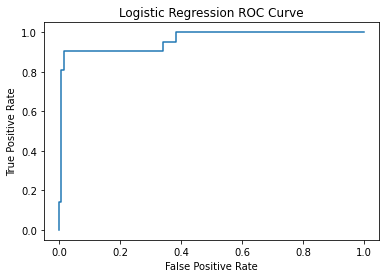

In [65]:
y_pred_prob_lr_m = reg_m.predict_proba(X_m_test)[:,1]

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_lr_m)

plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

AUC score:

In [66]:
roc_auc_score (y_test, y_pred_prob_lr_m)

0.9612554112554113

A slightly worse, but very similar AUC score than the previous dataset.

### K-Nearest Neighbors

Tuning the hyperparameters once again.

In [67]:
knn_m = KNeighborsClassifier()
#Range selected is odd neighbors from 1 to 21
n_neighbors = np.arange(1, 21, 2)
distances = ['euclidean', 'manhattan', 'chebyshev', 'minkowski',
            'wminkowski', 'seuclidean', 'mahalanobis']

param_grid = dict(n_neighbors=n_neighbors, metric=distances)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=28)
grid = GridSearchCV(estimator=knn_m, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
grid_result = grid.fit(X_m_train, y_train)

print("Best cross-validation score: {:.3f}".format(grid_result.best_score_))
best_n_neighbors = grid_result.best_params_.get('n_neighbors')
best_distance_metric = grid_result.best_params_.get('metric')
print("Best n_neighbors: {}".format(best_n_neighbors))
print("Best distance metric: {}".format(best_distance_metric))

Best cross-validation score: 0.940
Best n_neighbors: 1
Best distance metric: manhattan


Then using the **best_n_neighbors**, we train the model on the test set and test it on the test set.

In [68]:
knn_m = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_distance_metric)
knn_m.fit(X_m_train, y_train)
y_pred_knn_m = knn_m.predict(X_m_test)

#### Evaluation

Again, we will use precision, recall, F1 score and the confusion matrix to evaluate the model.

In [69]:
f1_score(y_test, y_pred_knn_m)

0.9767441860465117

In [70]:
recall_score(y_test, y_pred_knn_m)

1.0

In [71]:
precision_score(y_test, y_pred_knn_m)

0.9545454545454546

Full classification report:

In [72]:
print(classification_report(y_test, y_pred_knn_m))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.95      1.00      0.98        21

    accuracy                           1.00       241
   macro avg       0.98      1.00      0.99       241
weighted avg       1.00      1.00      1.00       241



Confusion matrix:

In [73]:
confusion_matrix(y_test, y_pred_knn_m)

array([[219,   1],
       [  0,  21]], dtype=int64)

Slightly worse, but similar performance.

#### Visualization

Visualization of the ROC Curve:

Text(0.5, 1.0, 'K-Nearest Neighbors ROC Curve')

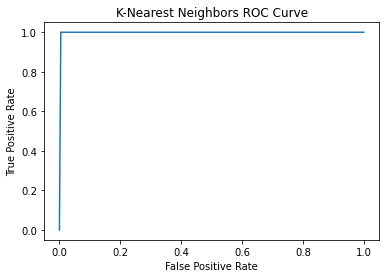

In [74]:
y_pred_prob_knn_m = knn_m.predict_proba(X_m_test)[:,1]

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_knn_m)

plt.plot(fpr, tpr, label = 'K-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')

AUC score:

In [75]:
roc_auc_score (y_test, y_pred_prob_knn_m)

0.9977272727272728

Worse AUC score by around 4%, but still very good in terms of predictions.

### Model/Dataset Comparison

We will compare the performance of the models on the new dataset versus the old dataset the same way as we compared the models initially.

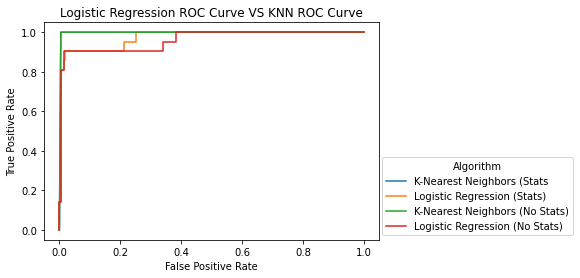

In [87]:
fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_knn)

plt.plot(fpr, tpr, label = 'K-Nearest Neighbors (Stats')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_lr)

plt.plot(fpr, tpr, label = 'Logistic Regression (Stats)')

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_knn_m)

plt.plot(fpr, tpr, label = 'K-Nearest Neighbors (No Stats)')

fpr, tpr, threshold = roc_curve (y_test, y_pred_prob_lr_m)

plt.plot(fpr, tpr, label = 'Logistic Regression (No Stats)')
plt.title('Logistic Regression ROC Curve VS KNN ROC Curve')
plt.legend(loc='right', bbox_to_anchor=(1.58, .2), borderaxespad=0, title='Algorithm')

In [89]:
print("Logistic Regression AUC Scores:\nStats: ", roc_auc_score (y_test, y_pred_prob_lr), "   No Stats: ", roc_auc_score (y_test, y_pred_prob_lr_m))
print("K-Nearest Neighbors AUC Score:\nStats: ", roc_auc_score (y_test, y_pred_prob_knn), "   No Stats: ", roc_auc_score (y_test, y_pred_prob_knn_m))

Logistic Regression AUC Scores:
Stats:  0.9733766233766233    No Stats:  0.9612554112554113
K-Nearest Neighbors AUC Score:
Stats:  0.9977272727272728    No Stats:  0.9977272727272728


The Logistic Regression model performed slightly better with stats present, and K-Nearest Neighbors performed the same. The no stats AUC scores are both very good, however.

### Recall

In [91]:
print("Logistic Regression recall:\nStats: ", recall_score(y_test, y_pred_lr), "   No Stats: ", recall_score(y_test, y_pred_lr_m))
print("K-Nearest Neighbors recall:\nStats: ", recall_score(y_test, y_pred_knn), "   No Stats: ", recall_score(y_test, y_pred_knn_m))

Logistic Regression recall:
Stats:  0.8095238095238095    No Stats:  0.8095238095238095
K-Nearest Neighbors recall:
Stats:  1.0    No Stats:  1.0


The recall on both sets were exactly the same, which is a good indicator that predictions are still possible without the stats being present.

### Precision

In [92]:
print("Logistic Regression precision:\nStats: ", precision_score(y_test, y_pred_lr), "   No Stats: ", precision_score(y_test, y_pred_lr_m))
print("K-Nearest Neighbors precision:\nStats: ", precision_score(y_test, y_pred_knn), "   No Stats: ", precision_score(y_test, y_pred_knn_m))

Logistic Regression percision:
Stats:  0.8947368421052632    No Stats:  0.9444444444444444
K-Nearest Neighbors percision:
Stats:  0.9545454545454546    No Stats:  0.9545454545454546


The precision for the Logistic Regression model improved without stats present, which is surprising. K-Nearest Neighbors remained the same again.

### F1 Score

In [93]:
print("Logistic Regression F1 Score:\nStats ", f1_score(y_test, y_pred_lr), "   No Stats: ", f1_score(y_test, y_pred_lr_m))
print("K-Nearest Neighbors F1 Score:\nStats ", f1_score(y_test, y_pred_knn), "   No Stats: ", f1_score(y_test, y_pred_knn_m))

Logistic Regression F1 Score:
Stats  0.8500000000000001    No Stats:  0.8717948717948718
K-Nearest Neighbors F1 Score:
Stats  0.9767441860465117    No Stats:  0.9767441860465117


As expected since the precision was higher for Logistic Regression without stats, the F1 score is also improved.

### Confusion Matrices

In [96]:
print("Logistic Regression (Stats):\n", confusion_matrix(y_test, y_pred_lr))
print("\nLogistic Regression (No Stats):\n", confusion_matrix(y_test, y_pred_lr_m))

print("\nK-Nearest Neighbors (Stats):\n", confusion_matrix(y_test, y_pred_knn))
print("\nK-Nearest Neighbors (No Stats):\n", confusion_matrix(y_test, y_pred_knn_m))

Logistic Regression (Stats):
 [[218   2]
 [  4  17]]

Logistic Regression (No Stats):
 [[219   1]
 [  4  17]]

K-Nearest Neighbors (Stats):
 [[219   1]
 [  0  21]]

K-Nearest Neighbors (No Stats):
 [[219   1]
 [  0  21]]


K-Nearest Neighbors performed exactly the same on the statless data, while Logistic Regression actually improved by misclassifying 1 less point on the statless data.

### Conclusion

Stating that Logistic Regression performs better without stats might be ambitious, as it was a set state test and only a one sample improvement, but it can be said that both models succeed in classifying legendary Pokémon even without the confirmed correlated feature of stats, which further supports the observation that the features of **capture_rate**, **base_egg_steps**, and **experience_growth** are also correlated with a Pokémon's legendary status. Outside of the dataset observations, K-Nearest Neighbors still outperformed Logistic Regression in this case, only misidentifying one sample.

## Final Remarks

In closing, in the case of creating a Legendary Pokémon Classifier, the K-Nearest Neighbors model outperformed, and seems to classify legendary Pokémon with a high precision and recall regardless of the **random_state** parameter. 

**Ideas to further improve the results:**
- **Normalization of the data:** This ideally would improve performance, but when attempted, it ended up destroying the performance of the K-Nearest Neighbors model, rather than improving it as predicted. This is likely due to the imbalanced nature of the dataset.
- **Balancing the dataset:** This was researched but ultimately decided against due to it being risky to do. Several resampling techniques exist for this, including oversampling the minority class, undersampling the majority class, or using synthetic sampling to create new samples.
- **Some tuning of the Logistic Regression model:** While no hyperparameter exists, there are certain parameters that could be tuned for this model for slighly different results, such as the solver, penalty, and C values. While this would not drastically increase the performance of the model, it could potentially slightly improve.